In [156]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
# print(mouse.head())
trial = pd.read_csv(clinical_trial_data_to_load)
# print(trial.head())

# Combine the data into a single dataset
data = pd.merge(trial, mouse, how="left", on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [83]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = data.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame
mean_tumor_vol.reset_index(inplace=True)
mean_tumor_vol = mean_tumor_vol[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Preview DataFrame
mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [84]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_err_tumor_vol = data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
std_err_tumor_vol.reset_index(inplace=True)
std_err_tumor_vol = std_err_tumor_vol[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Preview DataFrame
std_err_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [85]:
# Minor Data Munging to Re-Format the Data Frames - mean tumor volume
mean_tumor_vol_rft = mean_tumor_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_vol_rft.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [86]:
# Minor Data Munging to Re-Format the Data Frames - standard error tumor volume
std_err_tumor_vol_rft = std_err_tumor_vol.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
std_err_tumor_vol_rft.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


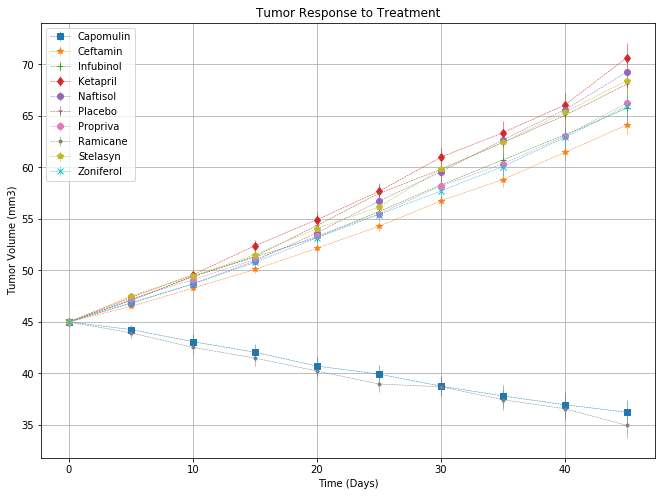

In [157]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(11, 8))
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid()

drugs = list(mean_tumor_vol_rft.columns)
markers=["s", "*", "+", "d", "o", "1", "8", ".", "p", "x"]

for i in np.arange(len(drugs)):
    plt.errorbar(mean_tumor_vol_rft.index, mean_tumor_vol_rft[drugs[i]], yerr=std_err_tumor_vol_rft[drugs[i]], 
                marker=markers[i], ls="dashed", lw=0.5)
    
plt.legend(loc=2)

# Save the Figure
plt.savefig("Images/mean_tumor_size.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [96]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = data.groupby(["Drug", "Timepoint"]).mean()

# Convert to DataFrame

mean_met_site.reset_index(inplace=True)
mean_met_site = mean_met_site[["Drug", "Timepoint", "Metastatic Sites"]]

# Preview DataFrame
mean_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [137]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_err_met_site = data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
std_err_met_site.reset_index(inplace=True)
std_err_met_site = pd.DataFrame(std_err_met_site[["Drug", "Timepoint", "Metastatic Sites"]])

# Preview DataFrame
std_err_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [102]:
# Minor Data Munging to Re-Format the Data Frames - Mean Met. Site
mean_met_site_rft = mean_met_site.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_site_rft.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [138]:
# Minor Data Munging to Re-Format the Data Frames - Standard Error associated with Met. Sites 
std_err_met_site_rft = std_err_met_site.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")


# Preview that Reformatting worked
std_err_met_site_rft.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


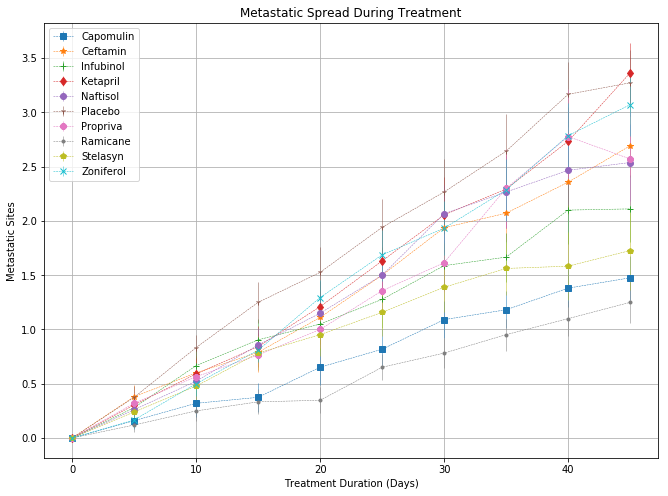

In [164]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(11, 8))
plt.title("Metastatic Spread During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid()

for i in np.arange(len(drugs)):
    plt.errorbar(mean_met_site_rft.index, mean_met_site_rft[drugs[i]], yerr=std_err_met_site_rft[drugs[i]], 
                marker=markers[i], ls="dashed", lw=0.5)
    
plt.legend(loc=2)

# Save the Figure
plt.savefig("Images/metastatic_spread.png")

# Show the Figure
plt.show()

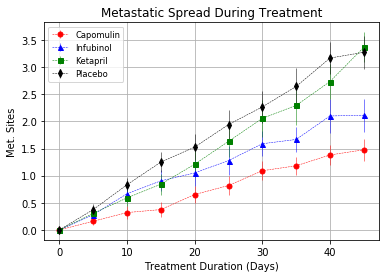

## Survival Rates

In [172]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"].rename("Mouse Count")

# Convert to DataFrame
survival = pd.DataFrame(survival)
survival.reset_index(inplace=True)

# Preview DataFrame
survival.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [231]:
# Minor Data Munging to Re-Format the Data Frames
survival_rft = survival.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
survival_rft

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


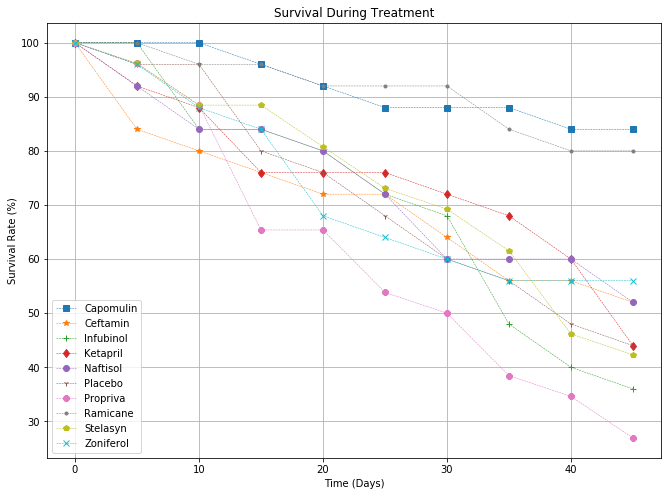

In [222]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(11, 8))
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid()

mice_start = survival_rft.iloc[0]
mice_start = mice_start.tolist()

for i in np.arange(len(drugs)):
    plt.errorbar(survival_rft.index, (survival_rft[drugs[i]] / mice_start[i]) * 100,
             marker=markers[i], ls="dashed", lw=0.5)
    
plt.legend(loc=3)

# Save the Figure
plt.savefig("Images/survival_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [243]:
# Calculate the percent changes for each drug
percent_change = ((mean_tumor_vol_rft.iloc[-1] - mean_tumor_vol_rft.iloc[0]) / mean_tumor_vol_rft.iloc[0]) * 100

# Display the data to confirm
percent_change.sort_values(inplace=True)
percent_change

Drug
Ramicane    -22.320900
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Zoniferol    46.579751
Propriva     47.241175
Placebo      51.297960
Stelasyn     52.085134
Naftisol     53.923347
Ketapril     57.028795
dtype: float64

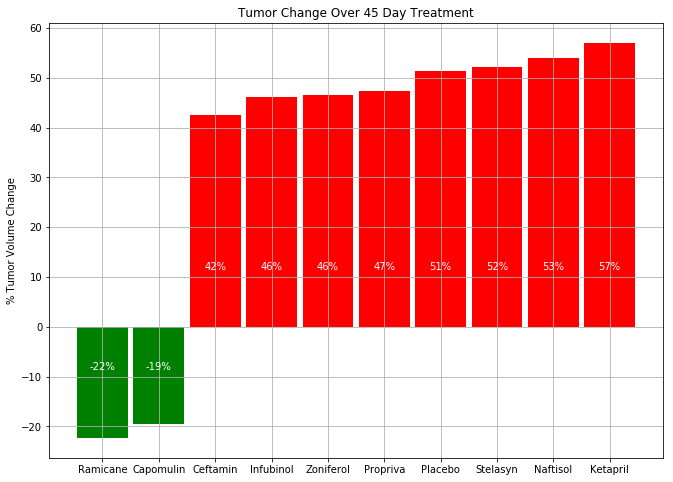

In [303]:
# Splice the data between passing and failing drugs
passing_drugs = percent_change.loc[percent_change <= 0]
failing_drugs = percent_change.loc[percent_change >= 0]


# Store all Relevant Percent Changes into a Tuple
passing_tuple = tuple(passing_drugs.tolist())
failing_tuple = tuple(failing_drugs.tolist())


# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots(figsize=(11, 8))
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()

passing_ind = len(passing_tuple)
failing_ind = len(passing_tuple) + len(failing_tuple)
ind = np.arange(failing_ind)
width = .9

passing_bars = ax.bar(ind[0: passing_ind], percent_change[0: passing_ind], width, color="green")
failing_bars = ax.bar(ind[passing_ind:], percent_change[passing_ind:], width, color="red")

ax.set_xticks(ind)
drugs = percent_change.keys().tolist()
ax.set_xticklabels(drugs)


# Use functions to label the percentages of changes
def autolabelPass(rects):
    """Attach a text label in each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -9,
                "%d%%" % int (height),
                ha="center", va="bottom", color="white")
        
def autolabelFail(rects):
    """Attach a text label in each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 11,
                "%d%%" % int (height),
                ha="center", va="bottom", color="white")

        
# Call functions to implement the function calls
autolabelPass(passing_bars)
autolabelFail(failing_bars)

# Save the Figure
plt.savefig("Images/tumor_change.png")

# Show the Figure
fig.show()